# Exercício 1
A partir da base de dados aero_gerador.txt, relativa a velocidade do vento e a potência gerada. Sendo a primeira coluna da base de dados a velocidade do Vento em (m/s) e a segunda coluna a Potência de saída.

Queremos modelar a Potência de saída, para isso compare os seguintes modelos:

image.png

Não se esqueça de realizar:

1 – análise descritiva

2 – Faça o modelo de regressão

3 – Análise comparativa dos Modelos e métricas 



In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
df = pd.read_csv('aero_gerador.txt', sep='\s+', header=None)
df.columns = ['X', 'Y']
df.head()

,X,Y
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [10]:
df.describe()

,X,Y
count,2250.000000,2250.000000
mean,9.142844,298.367111
std,1.801278,105.475604
min,0.000000,0.000000
25%,8.100000,226.000000
50%,8.900000,281.000000
75%,10.100000,368.000000
max,14.400000,522.000000


In [11]:
X = df['X'].values
Y = df['Y'].values

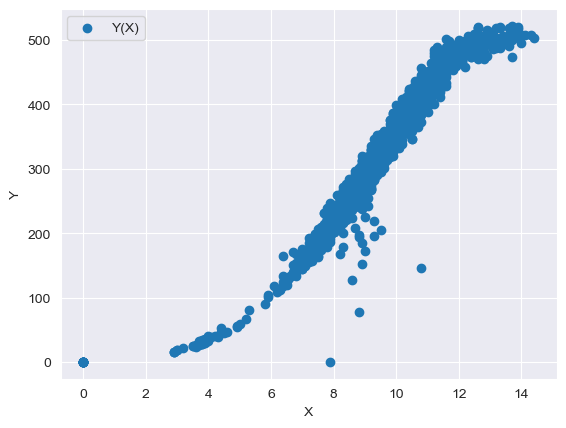

In [12]:
plt.scatter(X,Y,label='Y(X)');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

In [17]:
modelo1 = np.poly1d(np.polyfit(X, Y, 1))
modelo2 = np.poly1d(np.polyfit(X, Y, 2))
modelo3 = np.poly1d(np.polyfit(X, Y, 3))
modelo4 = np.poly1d(np.polyfit(X, Y, 4))
modelo5 = np.poly1d(np.polyfit(X, Y, 5))
modelo6 = np.poly1d(np.polyfit(X, Y, 6))
modelo7 = np.poly1d(np.polyfit(X, Y, 7))
modelo20 = np.poly1d(np.polyfit(X, Y, 20))
y1 = modelo1(X)
y2 = modelo2(X)
y3 = modelo3(X)
y4 = modelo4(X)
y5 = modelo5(X)
y6 = modelo6(X)
y7 = modelo7(X)
y20 = modelo20(X)

C:\Users\Lucia\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


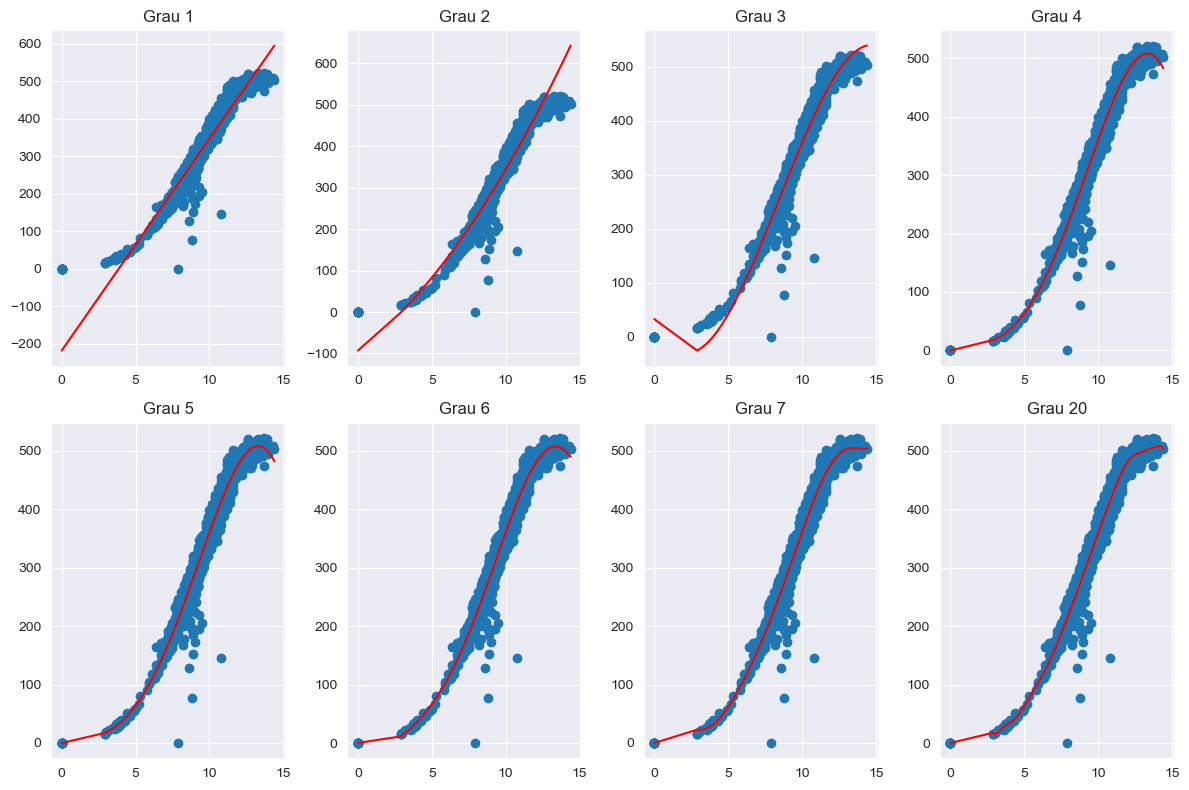

In [39]:
modelos = [y1, y2, y3, y4, y5, y6, y7, y20]
degrees = [1, 2, 3, 4, 5, 6, 7, 20]

# Criar a figura e os eixos para o subplot
fig, ax = plt.subplots(2, 4, figsize=(12, 8))  # Ajuste o tamanho conforme necessário

# Loop para plotar cada subplot
for i, (modelo, degree) in enumerate(zip(modelos, degrees)):
    row = i // 4  # Determina a linha do subplot
    col = i % 4   # Determina a coluna do subplot

    ax[row, col].scatter(X, Y)
    ax[row, col].plot(X, modelo, color='red')
    ax[row, col].set_title(f'Grau {degree}')

plt.tight_layout()
plt.show()

In [40]:
mae_values = []
mse_values = []

# Calcular MAE e MSE para cada conjunto de predições
for modelo in modelos:
    mae = mean_absolute_error(Y, modelo)
    mse = np.sqrt(mean_squared_error(Y, modelo))
    mae_values.append(mae)
    mse_values.append(mse)

# Criar um DataFrame com os resultados
resultados = pd.DataFrame({
    "Grau": degrees,
    "MAE": mae_values,
    "MSE": mse_values
})

# Mostrar o DataFrame
print(resultados)

   Grau        MAE        MSE
0     1  18.333294  28.066828
1     2  17.177335  25.082571
2     3  12.070704  18.559903
3     4  10.761026  17.093583
4     5  10.762796  17.093144
5     6  10.783760  17.081613
6     7  10.751915  17.050216
7    20  10.654267  17.010809


Claramente após o Grau 4, não temos ganhos significativos em relação aos erros, portanto o Grau 4 seria melhor para ser mais generalista. Graus superiores teriamos uma chance muito grande termos overfitting.

# Exercício 2 
Determinar a probabilidade do usuário de comprar uma SUV, baseado em sua idade e salário. Utilizando a base de dados SUV_Network_Ads.csvDownload SUV_Network_Ads.csv

4 – Faça o modelo de regressão

5 – realize a analise de resíduos

6 – Análise do Modelo

7 - Interpretação do ODDS

In [41]:
df = pd.read_csv('SUV_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [43]:
df.shape

(400, 5)

In [48]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [63]:


# Adicionar uma coluna constante para o intercepto
X = sm.add_constant(df[['Age', 'EstimatedSalary']])

# Criar e ajustar o modelo
model = sm.Logit(df['Purchased'], X)
result = model.fit()

# Exibir o resumo do modelo
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.4688
Time:                        01:23:00   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4340      1.300     -9.566      0.000     -14.982      -9.886
Age           

#### Análise do modelo:

Todos os coeficientes do modelo são estatisticamente significativos, com p-valores menores ou iguais a 0,05. Isso indica que tanto a idade quanto o salário estimado são preditores relevantes para a decisão de comprar uma SUV.



In [61]:
X = df[['Age', 'EstimatedSalary']]  # Variáveis independentes
y = df['Purchased']
model_ols = sm.OLS(y, X).fit()
influence = OLSInfluence(model_ols)
leverage = influence.hat_matrix_diag

# Verificando a presença de outliers e pontos de alavancagem
outliers_leverage = (leverage > 3) | (leverage < -3)
outliers_leverage.any()

False

Ausência de outliers e pontos de alavancagem entre 3 e -3

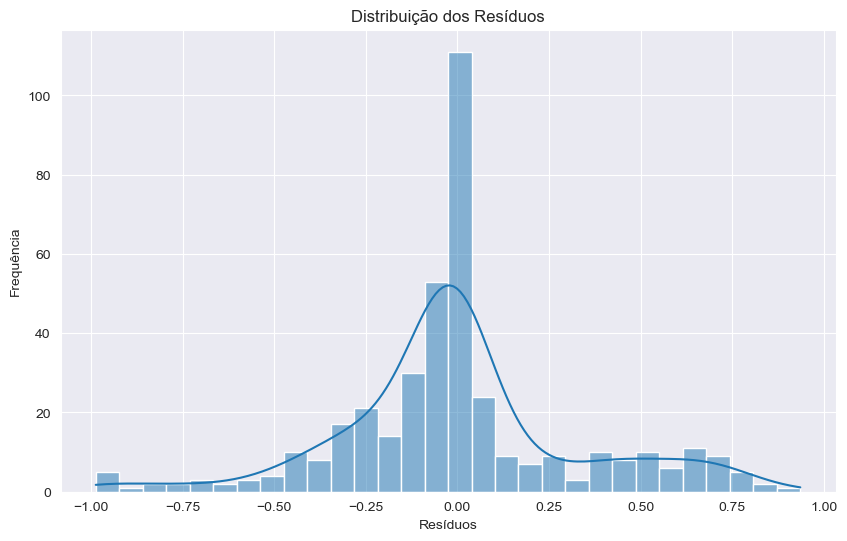

In [58]:
df['predicted'] = result.predict(X)

# Calculando os resíduos (diferença entre os valores observados e os preditos)
df['residuals'] = df['Purchased'] - df['predicted']

# Plotando a distribuição dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(df['residuals'], kde=True, bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

Aparentemente os residuos tem distribuição em torno do zero o que é bom!

In [53]:
# Calcular e exibir os odds ratio
odds_ratios = np.exp(result.params)
print(odds_ratios)


const              0.000004
Age                1.262999
EstimatedSalary    1.000036
dtype: float64


#### Idade: 
Para cada aumento de um ano na idade, as chances de comprar uma SUV aumentam em aproximadamente 26.3%. Isso significa que pessoas mais velhas têm uma probabilidade maior de comprar uma SUV em comparação com pessoas mais jovens, tudo o mais sendo igual.

#### Salário Estimado:
 Para cada aumento de uma unidade monetária no salário estimado, as chances de comprar uma SUV aumentam em aproximadamente 0.004%. Embora este aumento seja muito pequeno, ele se acumula com maiores valores salariais.